<a href="https://colab.research.google.com/github/umiSirya/General-Data-analysis/blob/main/Heart2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#load the csv file
path = '/content/heart_2022_with_nans.csv'
df = pd.read_csv(path)
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90833,Hawaii,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.63,62.60,23.69,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
90834,Hawaii,Male,Fair,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.68,68.04,24.21,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
90835,Hawaii,Female,Good,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,NaN,132.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90836,Hawaii,Male,Fair,10.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,"6 or more, but not all",Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Exploration**

In [ ]:
df.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,265
PhysicalHealthDays,2477
MentalHealthDays,2069
LastCheckupTime,1706
PhysicalActivities,237
SleepHours,1118
RemovedTeeth,3435
HadHeartAttack,739


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90838 entries, 0 to 90837
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      90838 non-null  object 
 1   Sex                        90838 non-null  object 
 2   GeneralHealth              90573 non-null  object 
 3   PhysicalHealthDays         88361 non-null  float64
 4   MentalHealthDays           88769 non-null  float64
 5   LastCheckupTime            89132 non-null  object 
 6   PhysicalActivities         90601 non-null  object 
 7   SleepHours                 89720 non-null  float64
 8   RemovedTeeth               87403 non-null  object 
 9   HadHeartAttack             90099 non-null  object 
 10  HadAngina                  89878 non-null  object 
 11  HadStroke                  90476 non-null  object 
 12  HadAsthma                  90440 non-null  object 
 13  HadSkinCancer              90107 non-null  obj

In [ ]:
import missingno as msno

<Axes: >

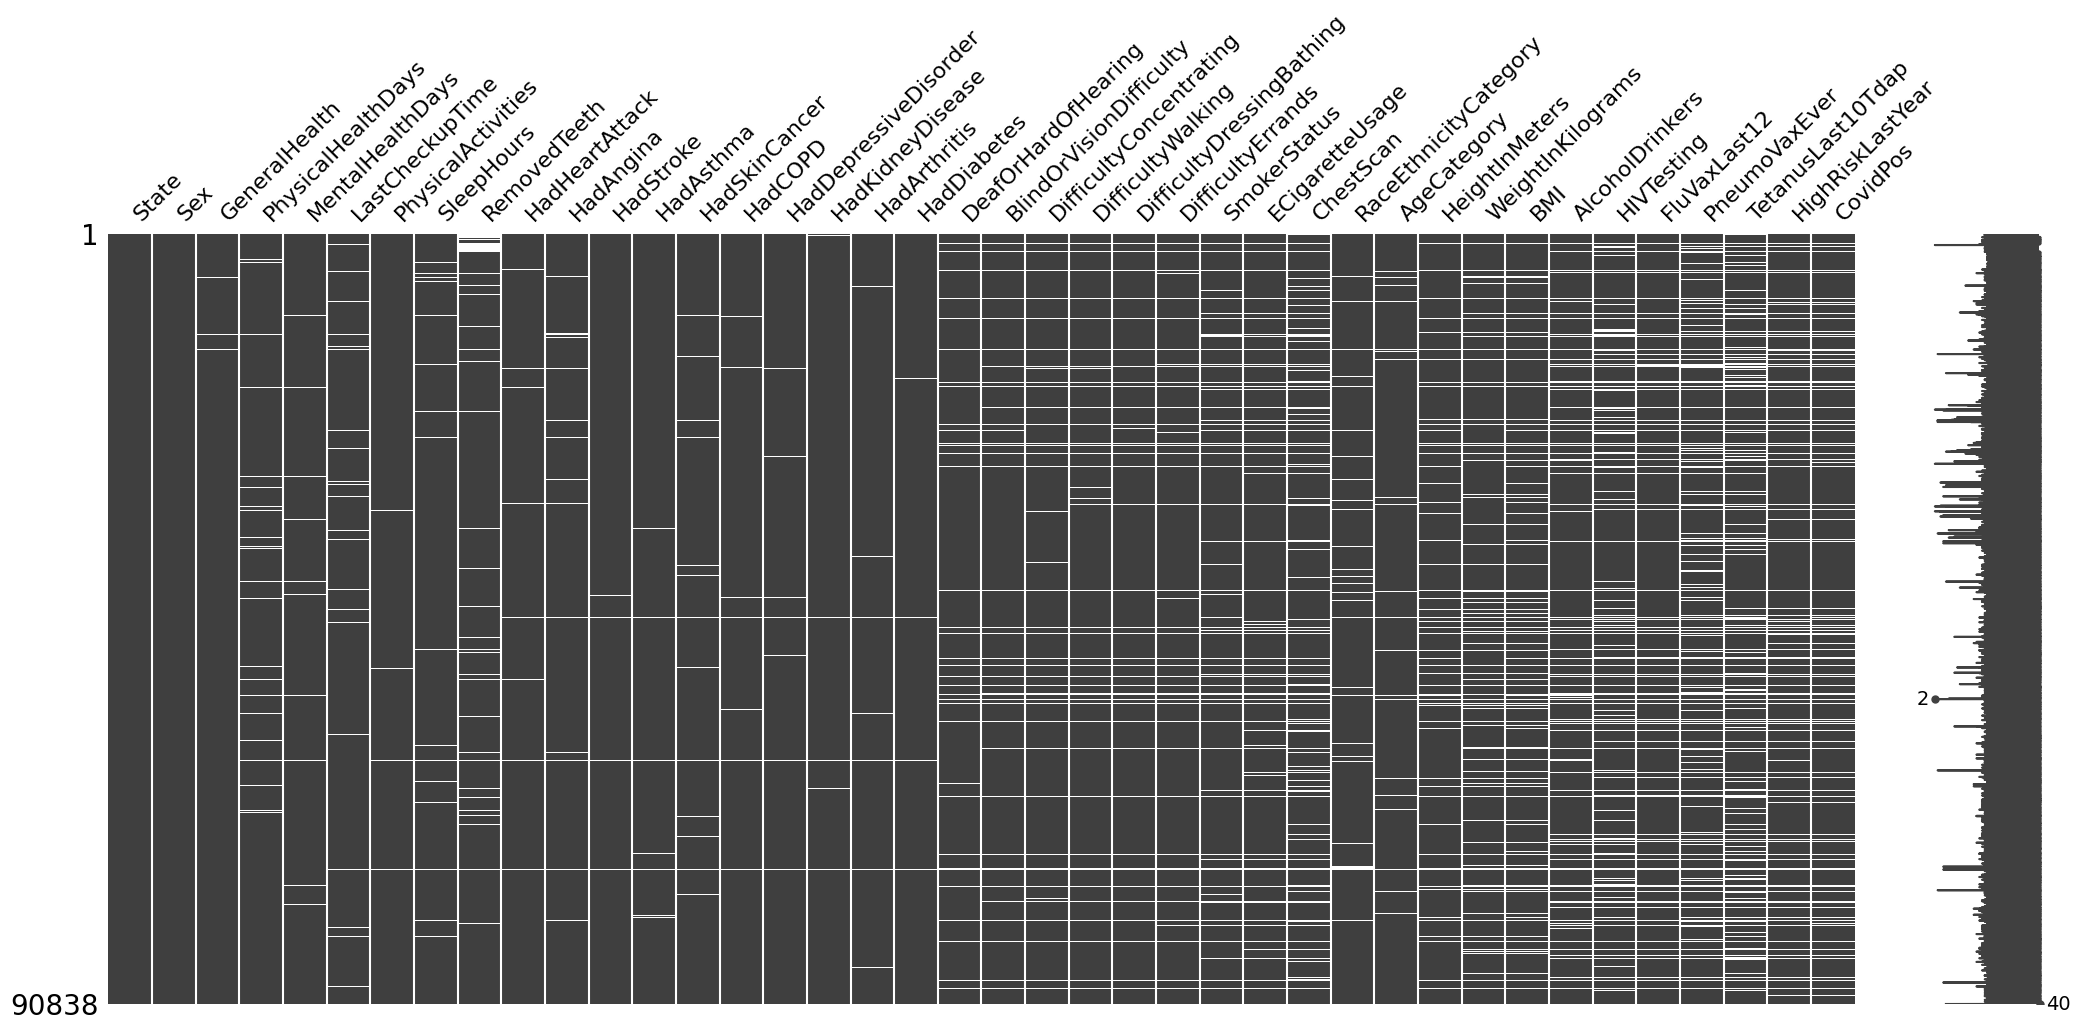

In [ ]:
msno.matrix(df)

<Axes: >

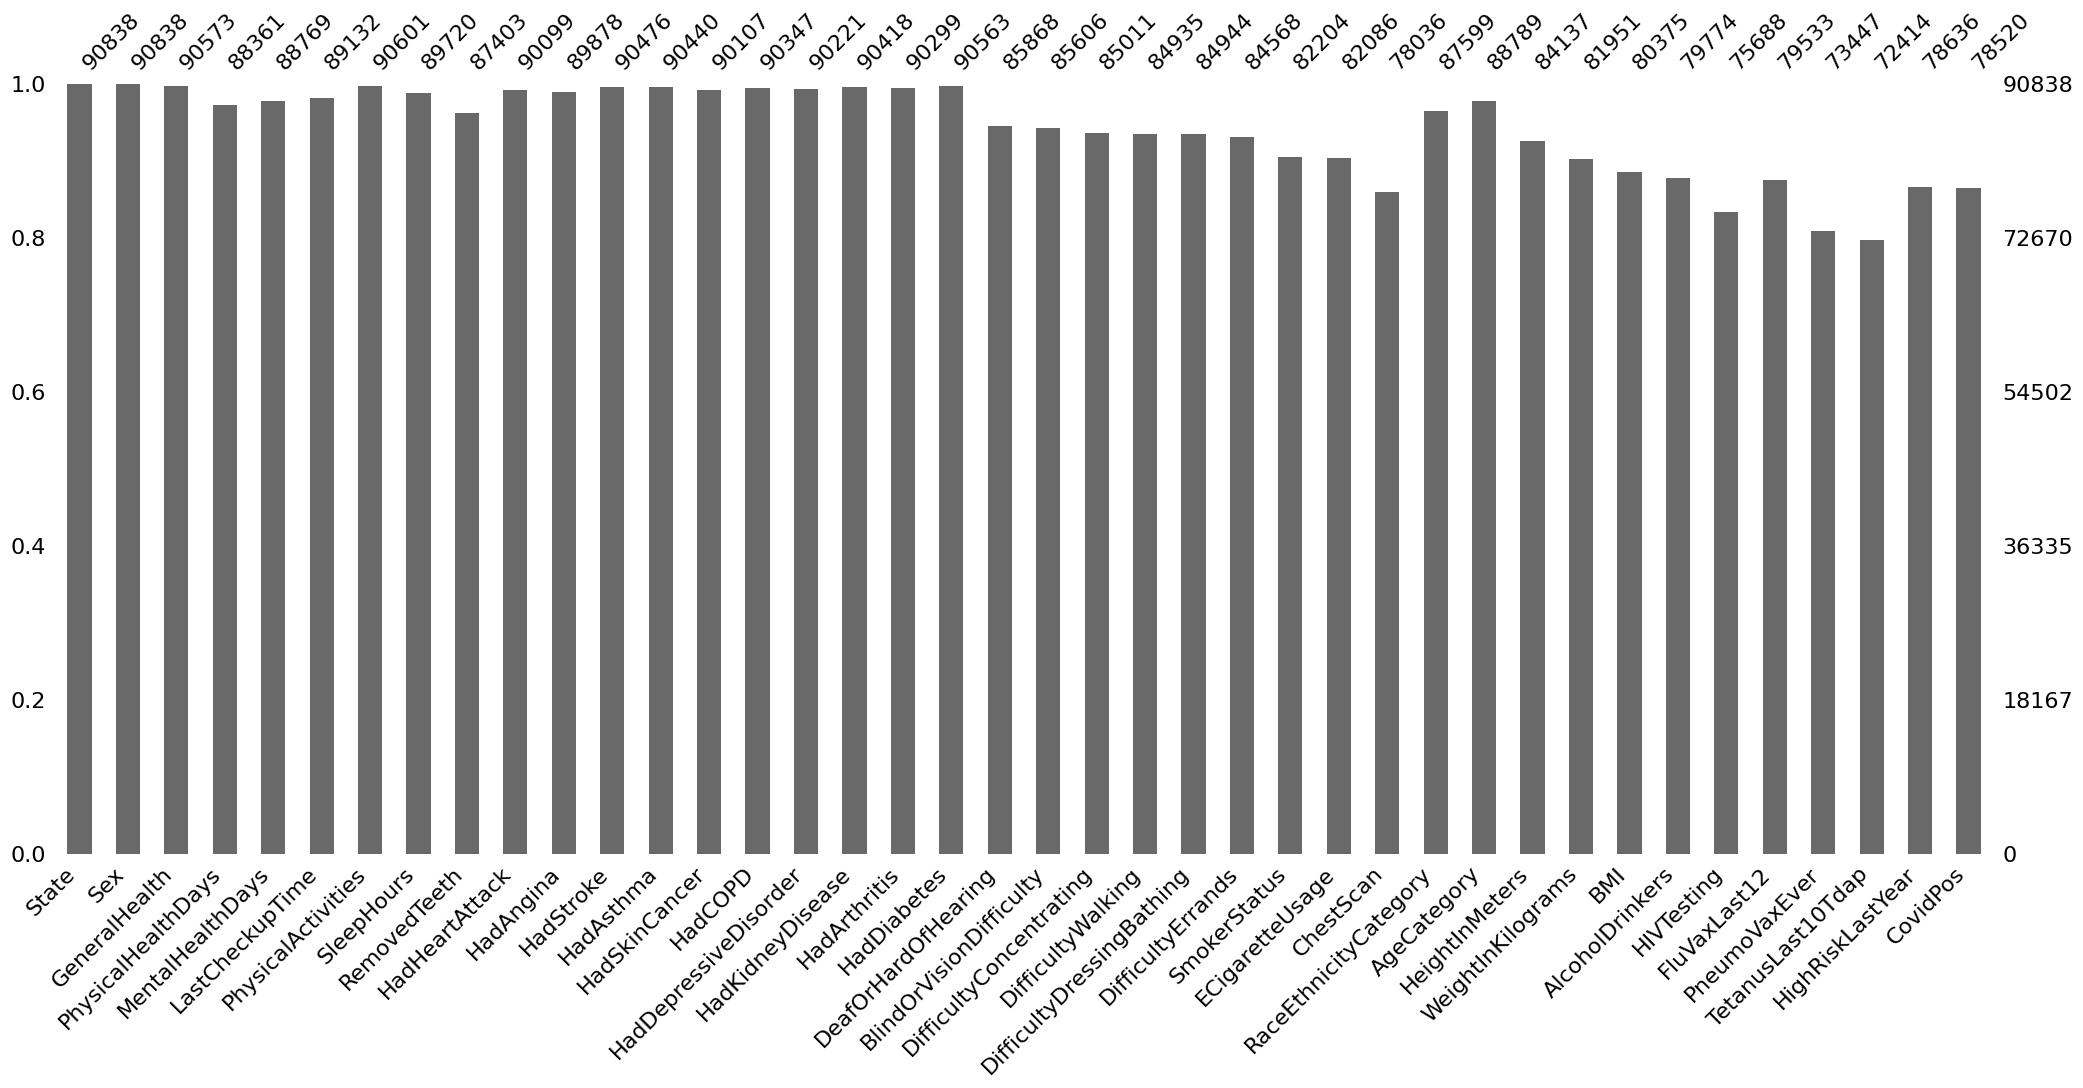

In [ ]:
msno.bar(df)

In [ ]:
df['GeneralHealth'].isnull().sum()

265

In [ ]:
df.value_counts('GeneralHealth')

,count
GeneralHealth,
Very good,29695
Good,29000
Excellent,15326
Fair,12311
Poor,4241


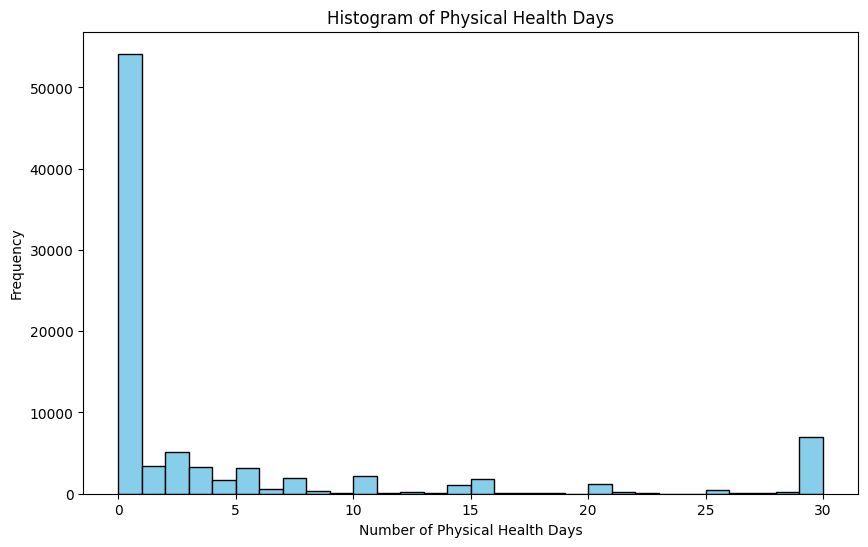

In [ ]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['PhysicalHealthDays'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Physical Health Days')
plt.ylabel('Frequency')
plt.title('Histogram of Physical Health Days')
plt.show()

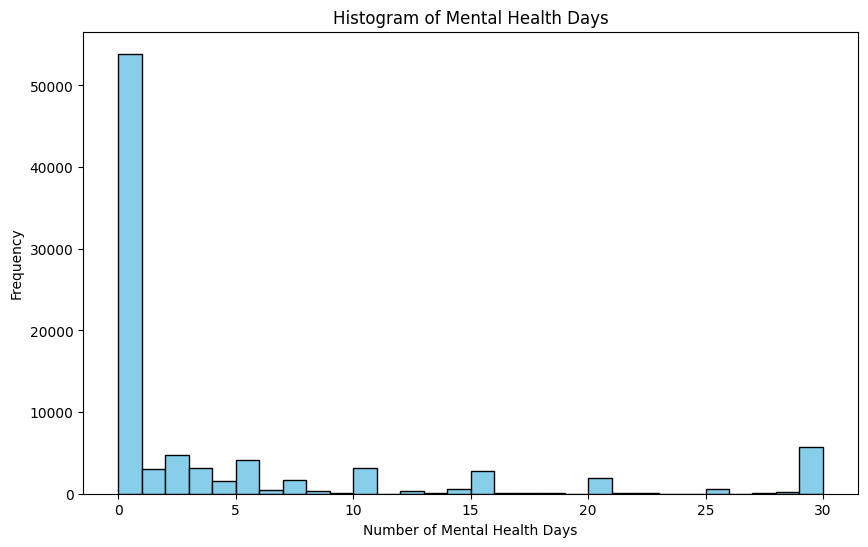

In [ ]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['MentalHealthDays'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Mental Health Days')
plt.ylabel('Frequency')
plt.title('Histogram of Mental Health Days')
plt.show()

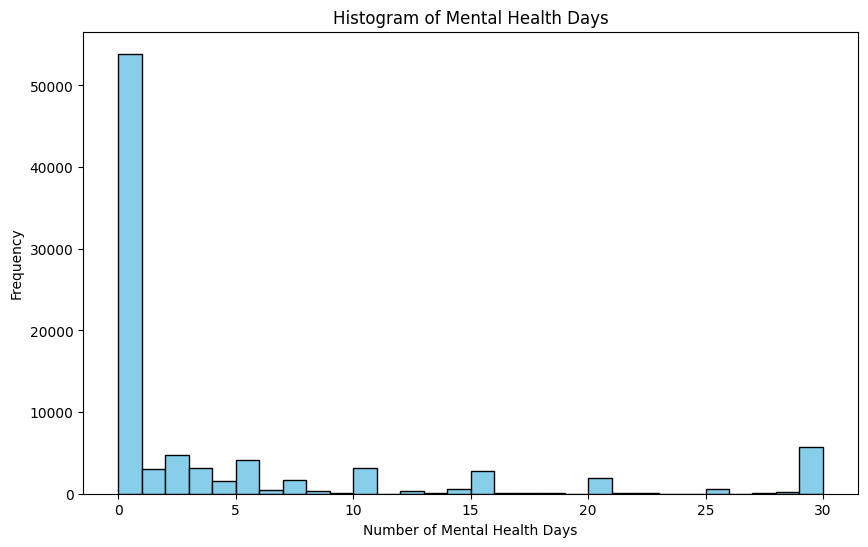

In [ ]:
# Plotting the histogram(Mentalhealth days)
plt.figure(figsize=(10, 6))
plt.hist(df['MentalHealthDays'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Mental Health Days')
plt.ylabel('Frequency')
plt.title('Histogram of Mental Health Days')
plt.show()

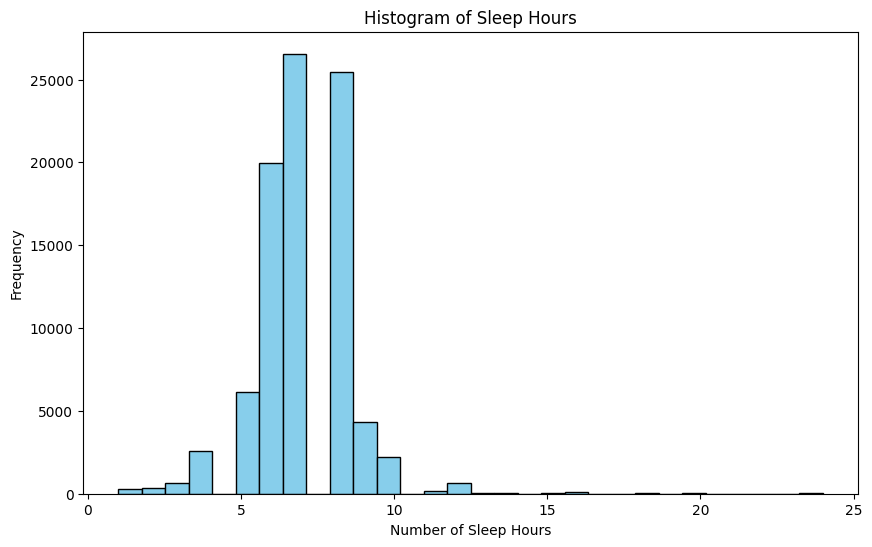

In [ ]:
# Plotting the histogram(Sleep Hours)
plt.figure(figsize=(10, 6))
plt.hist(df['SleepHours'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Sleep Hours')
plt.ylabel('Frequency')
plt.title('Histogram of Sleep Hours')
plt.show()

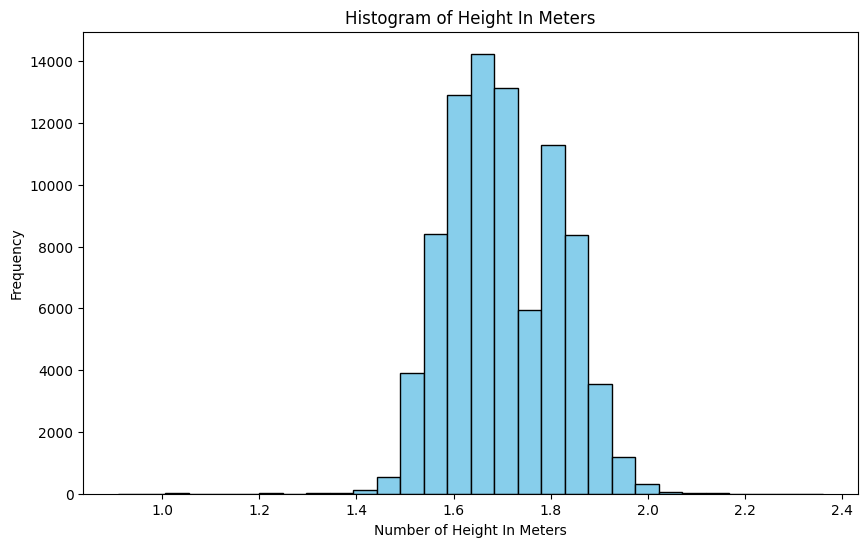

In [ ]:
# Plotting the histogram(Height In Meters)
plt.figure(figsize=(10, 6))
plt.hist(df['HeightInMeters'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Height In Meters')
plt.ylabel('Frequency')
plt.title('Histogram of Height In Meters')
plt.show()

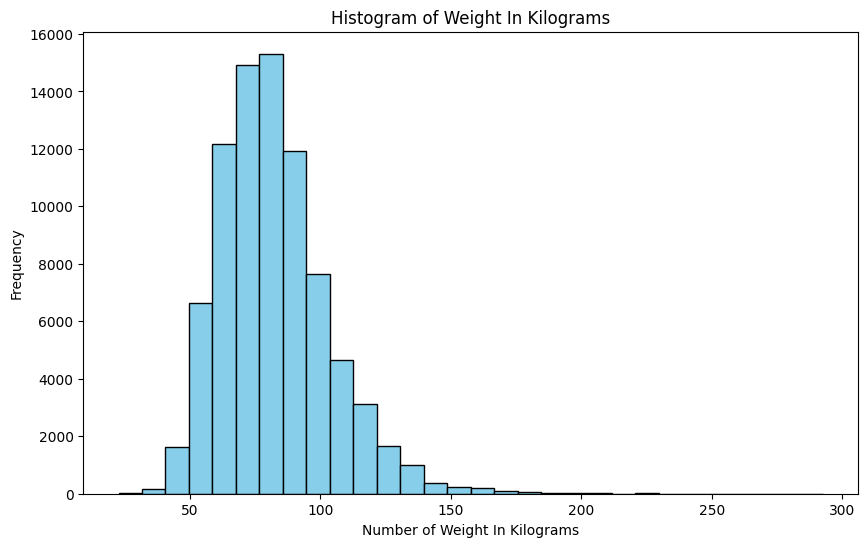

In [ ]:
# Plotting the histogram(Weight In Kilograms)
plt.figure(figsize=(10, 6))
plt.hist(df['WeightInKilograms'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Weight In Kilograms')
plt.ylabel('Frequency')
plt.title('Histogram of Weight In Kilograms')
plt.show()

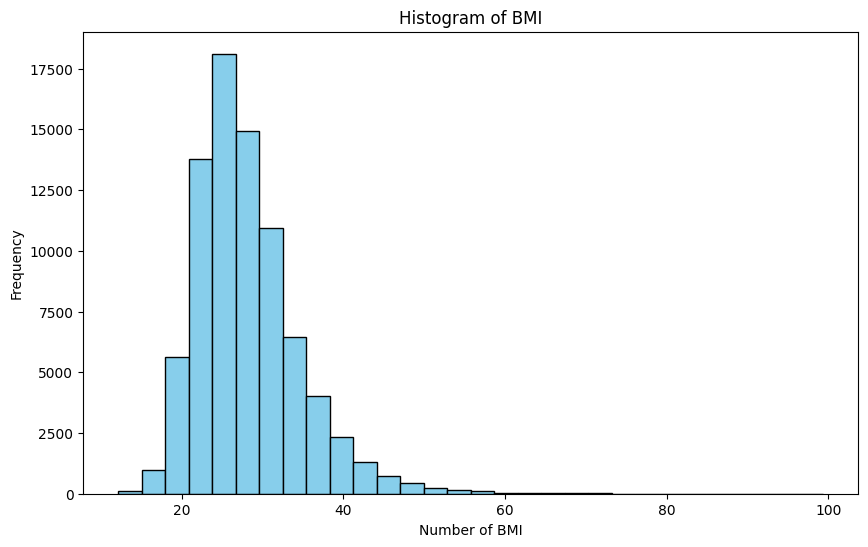

In [ ]:
# Plotting the histogram(BMI)
plt.figure(figsize=(10, 6))
plt.hist(df['BMI'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')
plt.show()

In [ ]:
df['HadDiabetes'].value_counts()

,count
HadDiabetes,
No,75265
Yes,12485
"No, pre-diabetes or borderline diabetes",2100
"Yes, but only during pregnancy (female)",713


# **Data Cleaning**

In [ ]:
# Define a list of column names where missing values will be filled with the mean of the column
numerical_data_mean = ['SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

# Fill missing values in the specified columns with the mean
for column in numerical_data_mean:
    df[column] = df[column].fillna(df[column].mean())

# Define a list of column names where missing values will be filled with the median of the column
numerical_data_median = ['PhysicalHealthDays', 'MentalHealthDays']

# Fill missing values in the specified columns with the median
for column in numerical_data_median:
    df[column] = df[column].fillna(df[column].median())

# Filling the 1 entry where age is 'Ag' with mode

# Calculate the mode of the AgeCategory column
mode_age = df['AgeCategory'].mode()[0]

# Replace 'Ag' in the AgeCategory column with the mode value
df['AgeCategory'] = df['AgeCategory'].replace('Ag', mode_age)

# List of categorical columns in the dataset that need missing values filled with mode
categorical_columns = [
    'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack',
    'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing',
    'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking',
    'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage',
    'ChestScan', 'RaceEthnicityCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos',
    'AgeCategory', 'HadDiabetes'
]

# Loop through each column in the list
for column in categorical_columns:
    # Get the mode (most frequent value) for the current column
    mode_value = df[column].mode()[0]

    # Fill missing (NaN) values in the column with the mode value
    df[column] = df[column].fillna(mode_value)  # Corrected line

# Checking for Null values in dataset
df.isnull().sum()




,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
RemovedTeeth,0
HadHeartAttack,0


In [ ]:
# List of columns to drop
columns_to_drop = [
    'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'RemovedTeeth',
    'HeightInMeters', 'WeightInKilograms', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'TetanusLast10Tdap', 'CovidPos','HadSkinCancer','HadAsthma'
]

# Drop the specified columns
df1 = df.drop(columns=columns_to_drop)

# Verify the columns have been dropped
df1.head()


,State,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadCOPD,HadDepressiveDisorder,...,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,BMI,AlcoholDrinkers,HighRiskLastYear
0,Alabama,Female,Very good,No,8.0,No,No,No,No,No,...,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,28.142488,No,No
1,Alabama,Female,Excellent,No,6.0,No,No,No,No,No,...,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,26.570000,No,No
2,Alabama,Female,Very good,Yes,5.0,No,No,No,No,No,...,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,25.610000,No,No
3,Alabama,Female,Excellent,Yes,7.0,No,No,No,No,No,...,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 65 to 69,23.300000,No,No
4,Alabama,Female,Fair,Yes,9.0,No,No,No,No,No,...,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,21.770000,Yes,No


In [ ]:
#check for duplicate columns but wont make sense to remove them
df.duplicated().sum()

71

# **Data Visualisation**

In [ ]:
df1.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalActivities', 'SleepHours',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'BMI', 'AlcoholDrinkers', 'HighRiskLastYear'],
      dtype='object')

In [ ]:
df1

,State,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadCOPD,HadDepressiveDisorder,...,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,BMI,AlcoholDrinkers,HighRiskLastYear
0,Alabama,Female,Very good,No,8.00000,No,No,No,No,No,...,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,28.142488,No,No
1,Alabama,Female,Excellent,No,6.00000,No,No,No,No,No,...,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,26.570000,No,No
2,Alabama,Female,Very good,Yes,5.00000,No,No,No,No,No,...,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,25.610000,No,No
3,Alabama,Female,Excellent,Yes,7.00000,No,No,No,No,No,...,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 65 to 69,23.300000,No,No
4,Alabama,Female,Fair,Yes,9.00000,No,No,No,No,No,...,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,21.770000,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90833,Hawaii,Female,Excellent,Yes,7.00000,No,No,No,No,No,...,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,23.690000,Yes,No
90834,Hawaii,Male,Fair,Yes,7.00000,No,No,No,No,No,...,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Other race only, Non-Hispanic",Age 65 to 69,24.210000,No,No
90835,Hawaii,Female,Good,Yes,7.00000,No,No,No,No,No,...,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Other race only, Non-Hispanic",Age 50 to 54,28.142488,Yes,No
90836,Hawaii,Male,Fair,Yes,6.00000,Yes,Yes,No,No,No,...,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Other race only, Non-Hispanic",Age 70 to 74,28.142488,Yes,No


In [ ]:
df1['AgeCategory'].value_counts()

,count
AgeCategory,
Age 65 to 69,11522
Age 70 to 74,9100
Age 60 to 64,8902
Age 80 or older,7672
Age 55 to 59,7373
Age 75 to 79,7059
Age 50 to 54,6676
Age 40 to 44,5953
Age 35 to 39,5784


# **Why Age 65-69 have better general health than other age categories?**

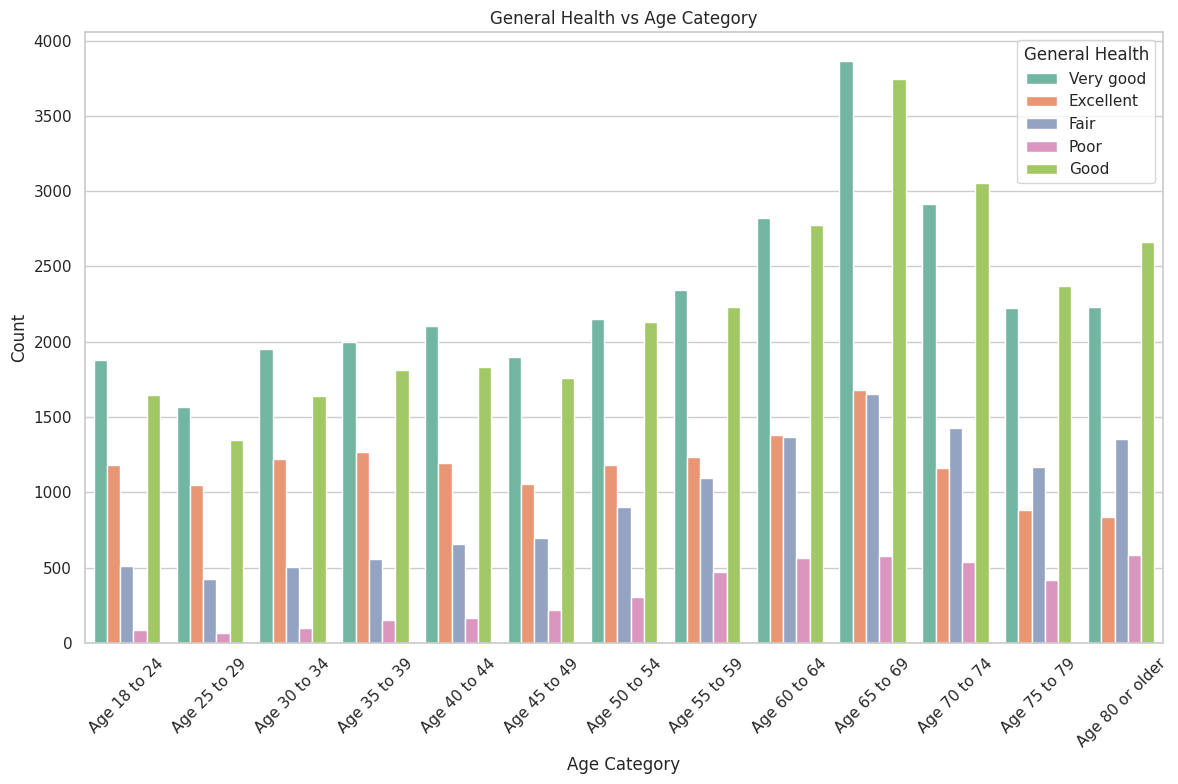

In [ ]:

# Set the style for the plots
sns.set(style="whitegrid")

# Define the custom order for age categories
age_order = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39',
             'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59',
             'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79',
             'Age 80 or older']

# Assuming df is your DataFrame and 'AgeCategory' is the column for age categories
# Create the count plot of GeneralHealth vs AgeCategory
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='AgeCategory', hue='GeneralHealth', palette='Set2', order=age_order)

# Set the title and labels
plt.title('General Health vs Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Display the legend
plt.legend(title='General Health', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


In [159]:
df1['AgeCategory'].value_counts()

,count
AgeCategory,
Age 65 to 69,11522
Age 70 to 74,9100
Age 60 to 64,8902
Age 80 or older,7672
Age 55 to 59,7373
Age 75 to 79,7059
Age 50 to 54,6676
Age 40 to 44,5953
Age 35 to 39,5784


In [171]:
import plotly.express as px
import pandas as pd

# Assuming your DataFrame is named df and is already defined
# Filter for 'Age 60 to 64' and 'Age 65 to 69'
df_filtered = df[df['AgeCategory'].isin(['Age 60 to 64', 'Age 65 to 69'])]

# Count the occurrences of each PhysicalActivity type (Yes or No) for both age groups
activity_counts = df_filtered.groupby(['AgeCategory', 'PhysicalActivities']).size().reset_index(name='Count')

# Create the plot for Physical Activities vs Count for each age category
fig = px.bar(activity_counts,
             x='PhysicalActivities',
             y='Count',
             color='AgeCategory',  # Different colors for each age group
             title="Physical Activity for Age 60 to 64 and Age 65 to 69",
             labels={'PhysicalActivities': 'Physical Activities', 'Count': 'Population Count'})

# Show the plot
fig.show()


This bar chart displays physical activity levels for two age groups, 60-64 and 65-69. The data shows the number of individuals within each group who either engage in physical activities ("Yes") or do not ("No").

Observations:
- A higher population count in both age groups is physically active compared to inactive.
- The "Yes" category has significantly more people in both age groups compared to the "No" category.
- Among the active individuals, the 65-69 age group is more represented than the 60-64 age group.

In [172]:
filtered_df = df[df['AgeCategory'].isin(['Age 60 to 64', 'Age 65 to 69'])]

# Create a box plot for SleepHours by AgeCategory
fig = px.box(filtered_df, x="AgeCategory", y="SleepHours", title="Sleep Hours Distribution for Age Categories 60-69")
fig.show()

This box plot displays the distribution of sleep hours for two age groups, 60-64 and 65-69.

Observations:
- The median sleep hours are similar for both groups, around 7 hours.
- Most sleep data falls between 5 to 9 hours for each group.
- Both age groups have a few outliers, with some individuals reporting over 15 hours and others below 5 hours of sleep.

In [175]:
# Filter the dataset for Age categories 60-64 and 65-69
filtered_data = df[df['AgeCategory'].isin(['Age 60 to 64', 'Age 65 to 69'])]



# Count the number of people with and without arthritis in each age category
arthritis_counts = filtered_data.groupby(['AgeCategory', 'HadArthritis']).size().reset_index(name='Count')

# Create a bar plot using Plotly
fig = px.bar(arthritis_counts,
             x='AgeCategory',
             y='Count',
             color='HadArthritis',
             barmode='stack',
             color_discrete_map={'Yes': 'salmon', 'No': 'lightblue'},
             title="Number of People with and without Arthritis in Age 60-64 and 65-69",
             labels={'AgeCategory': 'Age Category', 'Count': 'Count', 'HadArthritis': 'Had Arthritis'})

# Show the plot
fig.show()

      State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
3   Alabama  Female     Excellent                 0.0               0.0   
13  Alabama    Male     Very good                 0.0               0.0   
15  Alabama  Female     Excellent                 0.0               0.0   
16  Alabama  Female     Excellent                 0.0               0.0   
19  Alabama  Female     Very good                 0.0               0.0   

                                      LastCheckupTime PhysicalActivities  \
3   Within past year (anytime less than 12 months ...                Yes   
13  Within past year (anytime less than 12 months ...                Yes   
15  Within past year (anytime less than 12 months ...                Yes   
16  Within past year (anytime less than 12 months ...                Yes   
19  Within past year (anytime less than 12 months ...                Yes   

    SleepHours  RemovedTeeth HadHeartAttack  ... HeightInMeters  \
3          7.0  None of t

This stacked bar chart shows the number of people with and without arthritis in two age groups: 60-64 and 65-69.

Key observations:
- In both age groups, the majority of people do not have arthritis ("No").
- The count of individuals with arthritis ("Yes") is slightly higher in the 65-69 age group than in 60-64, but the overall distribution is similar between the two groups.


Based on the observations from the provided charts, there are several potential reasons why individuals in the 65-69 age category might exhibit better general health than those in slightly younger age groups:

1. **Higher Levels of Physical Activity**: The bar chart on physical activity shows that a larger portion of individuals in the 65-69 age group engage in physical activities compared to the 60-64 age group. Physical activity is a known contributor to better health, as it helps maintain mobility, cardiovascular health, and mental well-being, potentially leading to better general health outcomes.

2. **Balanced Sleep Patterns**: The box plot on sleep hours shows that both age groups (60-64 and 65-69) have similar sleep patterns, with the majority of individuals in each group averaging around 7 hours of sleep. However, consistency in sleep patterns within the older group may contribute to their overall health, as regular, adequate sleep is essential for immune function and cognitive health.

3. **Lower Incidence of Arthritis**: Although both age groups show a notable presence of arthritis, the 65-69 age group has a slightly higher count of individuals without arthritis than the 60-64 group. This could suggest that the individuals in the 65-69 category have managed their joint health well or maintained lifestyles that reduce the impact of arthritis, contributing to better general health.

In summary, the 65-69 age group appears to maintain better general health due to higher levels of physical activity, adequate sleep patterns, and a relatively lower burden of arthritis compared to the younger cohort (60-64). These factors likely play a key role in the sustained health and well-being observed in this age category.

# **Why are people living in Florida more prone to getting heart attacks compared to those in DC(District Columbia)?**

In [123]:
import plotly.express as px

# Filter data for Florida, District of Columbia, and Age Category 65-69
florida_dc_data = df[

    (df['AgeCategory'] == 'Age 65 to 69')
]

# Create a count plot using Plotly
fig = px.histogram(
    florida_dc_data,
    x='State',
    color='Sex',
    barmode='group',
    color_discrete_map={'Male': '#4DAF4A', 'Female': '#984EA3'},
    title='Health Condition: Had Heart Attack by State and Gender',
    labels={'Sex': 'Gender', 'State': 'State', 'count': 'Count'},
    category_orders={'State': ['Florida', 'District of Columbia']}
)

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Count',
    legend_title='Gender',
    font=dict(size=14),
    title_x=0.5,  # Center-align title
    bargap=0.2  # Space between bars
)

# Display the interactive plot
fig.show()


In [134]:
import plotly.express as px

# Filter data for Florida and District of Columbia
florida_dc_data = df[df['State'].isin(['Florida', 'District of Columbia'])]

# Create the interactive bar chart using Plotly
fig = px.histogram(
    florida_dc_data,
    x='State',
    color='HadAngina',
    barmode='group',  # Group bars by the 'HadAngina' values
    facet_col='Sex',  # Split the plot by gender
    color_discrete_sequence=['#f4a261', '#2a9d8f'],  # Color scheme for 'No' and 'Yes'
    labels={
        'State': 'State',
        'HadAngina': 'Had Angina',
        'count': 'Count',
    },
    title='Angina Prevalence by Gender and State (Florida vs. District of Columbia)'
)

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Count',
    title_x=0.5,  # Center-align title
    font=dict(size=12),
    height=600,
    width=800
)

# Display the plot
fig.show()


This chart shows the prevalence of angina (chest pain) among males and females in Florida and the District of Columbia, divided by whether the individuals had angina or not.

- In both states, a higher count of people reported not having angina (orange bars) compared to those who did (teal bars).
- Florida has a significantly larger population with and without angina compared to the District of Columbia for both genders.
- Among both males and females, the prevalence of angina is higher in Florida than in the District of Columbia.

In [126]:

# Filter data for Florida and District of Columbia
florida_dc_data = df[df['State'].isin(['Florida', 'District of Columbia'])]

# Create the interactive box plot using Plotly
fig = px.box(
    florida_dc_data,
    x='State',
    y='BMI',
    color='State',
    title='BMI Distribution in Florida vs. District of Columbia',
    color_discrete_sequence=px.colors.qualitative.Set1,
    points=False  # Exclude outliers (scatter points)
)

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='State',
    yaxis_title='BMI',
    title_x=0.5,  # Center-align title
    font=dict(size=14),
)

# Display the plot
fig.show()


This box plot shows the distribution of BMI in Florida and the District of Columbia.

- The median BMI for both states is similar, but Florida has a wider range of BMI values, with more extreme high and low values.
- The interquartile range (IQR) is larger for Florida, indicating greater variability in BMI.
- The District of Columbia has a narrower IQR and fewer outliers, suggesting a more concentrated BMI distribution around the median.

In [149]:
import plotly.express as px

# Filter data for Florida and District of Columbia
florida_dc_data = df[df['State'].isin(['Florida', 'District of Columbia'])]

# Create an interactive bar chart using Plotly
fig = px.histogram(
    florida_dc_data,
    x='HadStroke',
    color='State',
    barmode='group',
    color_discrete_sequence=px.colors.qualitative.Set2,
    labels={
        'HadStroke': 'Stroke History',
        'State': 'State',
        'count': 'Count',
    },
    title='Prevalence of Stroke in Florida vs. District of Columbia'
)

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='Stroke History',
    yaxis_title='Count',
    title_x=0.5,  # Center-align title
    legend_title='State',
    font=dict(size=14),
    bargap=0.2  # Space between bars
)

# Show the plot
fig.show()


This bar chart compares the prevalence of stroke history in Florida and the District of Columbia.

- A large majority of individuals in both states reported no history of stroke.
- Florida has a significantly higher count of individuals without a stroke history compared to the District of Columbia.
- The number of individuals with a history of stroke is very low in both states, with slightly more cases in Florida than in the District of Columbia.

In [146]:
# Filter the data for Florida and District of Columbia
florida_dc_data = df[df['State'].isin(['Florida', 'District of Columbia'])]

# Create a count plot (bar plot) to show the distribution of HadCOPD in these states
fig = px.histogram(
    florida_dc_data,
    x='State',
    color='HadCOPD',
    barmode='group',
    color_discrete_map={'No': 'lightblue', 'Yes': 'salmon'},
    labels={
        'HadCOPD': 'Had COPD',
        'State': 'State',
        'count': 'Count'
    },
    title="Distribution of 'Had COPD' in Florida vs. District of Columbia"
)

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Count',
    title_x=0.5,  # Center-align title
    font=dict(size=14),
    bargap=0.2  # Space between bars
)

# Display the plot
fig.show()


The bar chart compares the distribution of people who have or haven't had COPD (Chronic Obstructive Pulmonary Disease) in Florida and the District of Columbia.

In Florida, the majority of respondents reported not having COPD, with a much smaller portion indicating they had the condition.
In the District of Columbia, the number of people without COPD is lower than in Florida, and the number of people with COPD is also small

In [147]:
import plotly.express as px
import pandas as pd

# Filter data for Florida and District of Columbia
florida_dc_data = df[df['State'].isin(['Florida', 'District of Columbia'])]

# Create an interactive bar chart to visualize the distribution of AlcoholDrinkers
fig = px.histogram(
    florida_dc_data,
    x='AlcoholDrinkers',
    color='State',
    barmode='group',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    labels={
        'AlcoholDrinkers': 'Alcohol Drinking Status',
        'State': 'State',
        'count': 'Count',
    },
    title='Alcohol Drinking Status Distribution in Florida vs. District of Columbia'
)

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='Alcohol Drinking Status',
    yaxis_title='Count',
    title_x=0.5,  # Center-align title
    legend_title='State',
    font=dict(size=14),
    bargap=0.2  # Space between bars
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# Display the plot
fig.show()


The bar chart shows the distribution of alcohol drinking status (Yes or No) in Florida and the District of Columbia.

Key observations:
- In both states, a larger proportion of respondents report drinking alcohol ("Yes") compared to those who do not ("No").
- Florida has a higher count of both drinkers and non-drinkers than the District of Columbia, suggesting a larger sample size or population surveyed in Florida.

This indicates that alcohol consumption is more commonly reported in Florida, with similar trends in both states.

# **Conclusion**
**Higher COPD and Stroke Prevalence:** Florida has a slightly higher prevalence of individuals with a history of COPD and stroke, both of which are risk factors for heart disease and heart attacks. COPD affects lung function and oxygen levels, placing additional strain on the heart, while a history of stroke can indicate cardiovascular issues that could also lead to heart attacks.

**Angina (Chest Pain) Rates:** The prevalence of angina is higher in Florida for both males and females, suggesting that more people in the state have experienced chest pain or symptoms of coronary artery disease. Angina is often a warning sign of heart disease, which increases the risk of heart attacks.

**Higher BMI Variability:** Florida shows a wider range and higher variability in BMI values, including more extreme high values. Obesity is a significant risk factor for heart disease, and a higher BMI range in Florida implies a greater population at risk of obesity-related heart conditions.

**Alcohol Consumption:** Alcohol consumption is also higher in Florida, and excessive alcohol intake can contribute to high blood pressure, obesity, and poor heart health, all of which increase the likelihood of heart attacks.

**Larger Population and Aging Demographics:** Although not directly shown in the charts, Florida has a larger and older population compared to DC, as it is a popular retirement state. Age is a primary risk factor for heart attacks, and Florida’s older population may partly explain the higher prevalence of heart attacks.

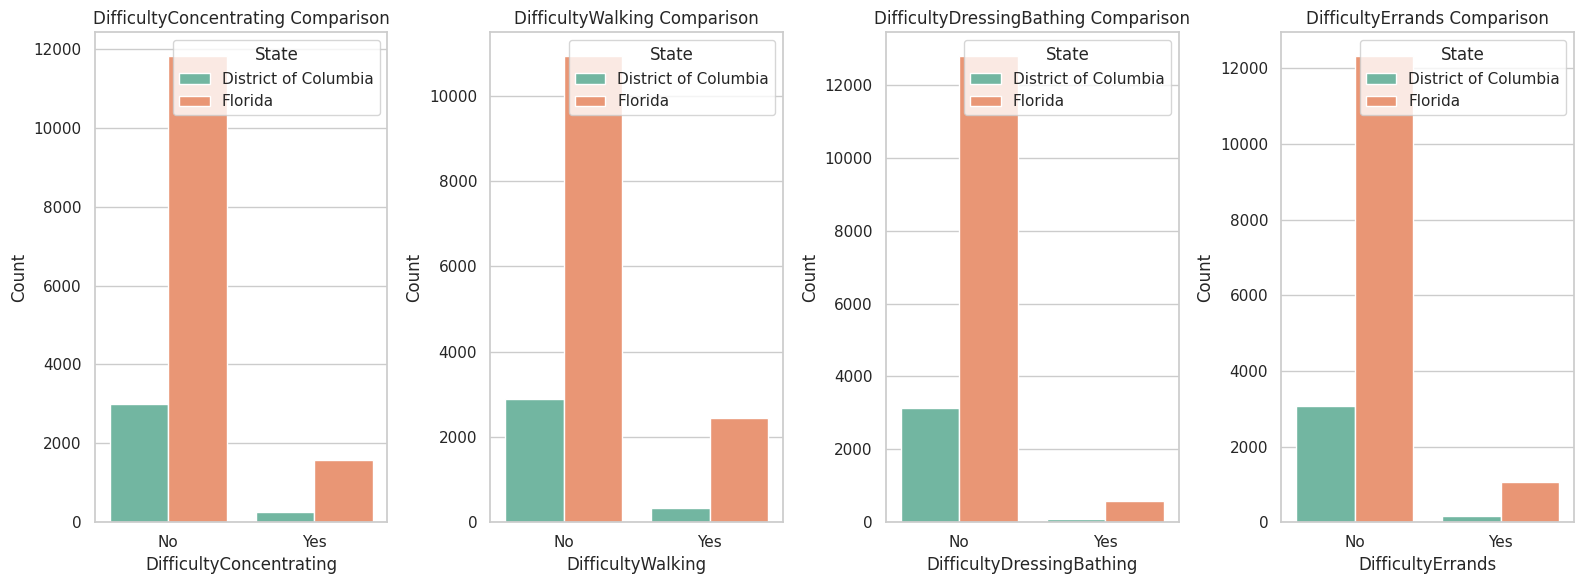

In [153]:

# Filter the data for Florida and District of Columbia
florida_dc_data = df1[df1['State'].isin(['Florida', 'District of Columbia'])]

# List of health conditions to plot
health_conditions = [
    'DifficultyConcentrating',
    'DifficultyWalking',
    'DifficultyDressingBathing',
    'DifficultyErrands'
]

# Create a figure with subplots (side by side horizontally)
fig, axes = plt.subplots(1, len(health_conditions), figsize=(16, 6))

# Loop through health conditions and plot each one
for i, condition in enumerate(health_conditions):
    sns.countplot(data=florida_dc_data, x=condition, hue='State', palette='Set2', ax=axes[i])
    axes[i].set_title(f'{condition} Comparison')
    axes[i].set_xlabel(f'{condition}')
    axes[i].set_ylabel('Count')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()



The care for older adults in Florida and the District of Columbia (DC) varies due to differences in demographics, healthcare access, and resources:

1. **Demographics**: Florida has one of the highest populations of elderly people in the U.S., which has led to a well-developed infrastructure for senior care, including a large number of retirement communities, nursing homes, and home health services. DC, while also serving an aging population, has a smaller proportion of seniors and fewer facilities dedicated specifically to elder care.

2. **Healthcare Access**: Florida's vast size means that while there are many healthcare facilities, seniors in rural or remote areas may face challenges in accessing timely care. In contrast, DC's smaller, more urbanized setting offers better access to healthcare providers, but it may be more expensive and less tailored to seniors compared to Florida's specialized services.

3. **Long-Term Care**: Florida has a robust network of long-term care options, including assisted living and nursing homes, driven by the state's older population. DC, while offering high-quality healthcare, has fewer long-term care facilities, and its urban setting may create competition for resources.

4. **Health Insurance**: Florida has a relatively higher number of uninsured seniors compared to DC, where residents benefit from more comprehensive insurance coverage through Medicaid expansion under the Affordable Care Act, ensuring more consistent healthcare access for elderly people.

In summary, Florida offers extensive senior care options due to its large elderly population, while DC provides more centralized healthcare but may face resource constraints for elderly care services.